In [19]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

In [20]:
X = []
Y = []

for i in tqdm(glob('Dataset/train/Open_Eyes/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(1)
    
for i in tqdm(glob('Dataset/train/Closed_Eyes/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(0)    




100%|██████████| 2000/2000 [00:03<00:00, 580.00it/s]


In [21]:
X = np.array(X)
X = X/255.0
Y = np.array(Y)
X

array([[[0.14901961, 0.16470588, 0.18039216, ..., 0.34901961,
         0.35294118, 0.35294118],
        [0.14509804, 0.16470588, 0.18039216, ..., 0.35686275,
         0.35294118, 0.35294118],
        [0.14509804, 0.16862745, 0.18039216, ..., 0.36470588,
         0.36078431, 0.35686275],
        ...,
        [0.18823529, 0.20392157, 0.22352941, ..., 0.27843137,
         0.28235294, 0.29019608],
        [0.19215686, 0.2       , 0.21960784, ..., 0.2745098 ,
         0.2745098 , 0.28235294],
        [0.19215686, 0.2       , 0.21960784, ..., 0.2745098 ,
         0.2745098 , 0.2745098 ]],

       [[0.34117647, 0.34117647, 0.34509804, ..., 0.19215686,
         0.18431373, 0.17647059],
        [0.32941176, 0.3372549 , 0.34509804, ..., 0.18431373,
         0.18431373, 0.18039216],
        [0.33333333, 0.33333333, 0.33333333, ..., 0.17647059,
         0.18823529, 0.17647059],
        ...,
        [0.2627451 , 0.25490196, 0.25098039, ..., 0.24313725,
         0.24313725, 0.24313725],
        [0.2

In [23]:
X = np.expand_dims(X,-1)
X

array([[[[[0.14901961]],

         [[0.16470588]],

         [[0.18039216]],

         ...,

         [[0.34901961]],

         [[0.35294118]],

         [[0.35294118]]],


        [[[0.14509804]],

         [[0.16470588]],

         [[0.18039216]],

         ...,

         [[0.35686275]],

         [[0.35294118]],

         [[0.35294118]]],


        [[[0.14509804]],

         [[0.16862745]],

         [[0.18039216]],

         ...,

         [[0.36470588]],

         [[0.36078431]],

         [[0.35686275]]],


        ...,


        [[[0.18823529]],

         [[0.20392157]],

         [[0.22352941]],

         ...,

         [[0.27843137]],

         [[0.28235294]],

         [[0.29019608]]],


        [[[0.19215686]],

         [[0.2       ]],

         [[0.21960784]],

         ...,

         [[0.2745098 ]],

         [[0.2745098 ]],

         [[0.28235294]]],


        [[[0.19215686]],

         [[0.2       ]],

         [[0.21960784]],

         ...,

         [[0.2745098 ]],

 

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

model = tf.keras.models.Sequential([
      Input(shape=(64, 64, 1)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten(),
      Dense(units  = 256, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 128, use_bias=False, activation = 'relu'),

      Dense(units = 84, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
  ])

In [26]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 60, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 56, 32)     │        25,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 56, 56, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 84)             │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 84)             │           336 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,486,437 (9.49 MB)

 Trainable params: 2,485,565 (9.48 MB)

 Non-trainable params: 872 (3.41 KB)

In [28]:
# callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath='bestModel.h5',
#     save_weights_only=False,
#     monitor='val_loss',
#     mode='min',
#     save_best_only=True,
#     verbose =1)
# history=model.fit(x_train, y_train, validation_split=0.2, epochs=30, batch_size=32,validation_data=x_test, callbacks=callback)

callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestModel.keras',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1)
history = model.fit(x_train, y_train, validation_split=0.2, epochs=30, batch_size=32, validation_data=(x_test, y_test), callbacks=callback)

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.8878 - loss: 0.2448
Epoch 1: val_loss improved from inf to 1.09913, saving model to bestModel.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - accuracy: 0.8885 - loss: 0.2433 - val_accuracy: 0.4788 - val_loss: 1.0991
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.9926 - loss: 0.0268
Epoch 2: val_loss did not improve from 1.09913
84/84 ━━━━━━━━━━━━━━━━━━━━ 14s 165ms/step - accuracy: 0.9926 - loss: 0.0268 - val_accuracy: 0.4932 - val_loss: 2.2985
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.9868 - loss: 0.0403
Epoch 3: val_loss did not improve from 1.09913
84/84 ━━━━━━━━━━━━━━━━━━━━ 14s 161ms/step - accuracy: 0.9868 - loss: 0.0402 - val_accuracy: 0.6614 - val_loss: 1.2268
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.9925 - loss: 0.0195
Epoch 4: val_loss improved from 1.09913 to 0.17639, saving model to bestModel.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 15s 179ms/step - 

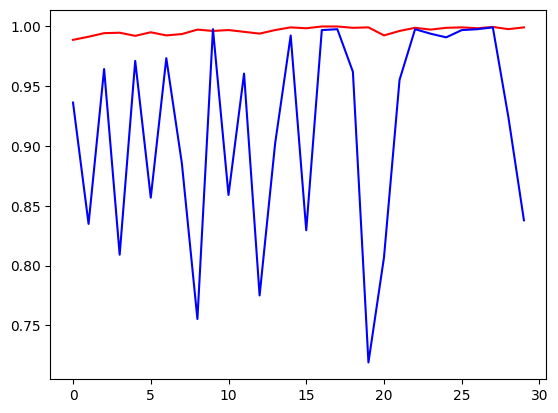

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.show()

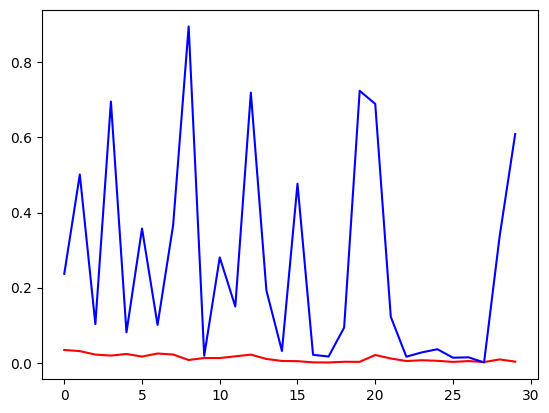

In [27]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.show()

In [28]:
model.evaluate(x_test, y_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8187 - loss: 0.7177


[0.6090638637542725, 0.8378787636756897]

In [8]:
from keras.models import load_model
best_model = load_model('bestModel.keras')
# best_model.evaluate(x_test, y_test)

In [6]:
x_test

array([[[[0.16078431],
         [0.16862745],
         [0.16470588],
         ...,
         [0.29803922],
         [0.3254902 ],
         [0.34509804]],

        [[0.14117647],
         [0.14117647],
         [0.1372549 ],
         ...,
         [0.23921569],
         [0.25490196],
         [0.29803922]],

        [[0.10980392],
         [0.11372549],
         [0.10588235],
         ...,
         [0.23529412],
         [0.2       ],
         [0.22352941]],

        ...,

        [[0.31372549],
         [0.32156863],
         [0.34117647],
         ...,
         [0.50588235],
         [0.47058824],
         [0.43137255]],

        [[0.31764706],
         [0.32941176],
         [0.34117647],
         ...,
         [0.49411765],
         [0.45098039],
         [0.41960784]],

        [[0.31764706],
         [0.34117647],
         [0.34509804],
         ...,
         [0.45882353],
         [0.41960784],
         [0.41176471]]],


       [[[0.35686275],
         [0.37254902],
         [0.36

In [29]:
for i in x_test[0:5]:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Open')
    else:
        print("Closed")
    

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Open


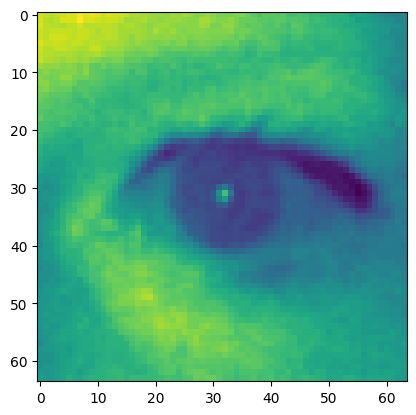

In [ ]:
random_image=x_test[np.random.randint(0,1321)]
predicted=best_model.predict(np.expand_dims(random_image,0))
plt.imshow(random_image)
if predicted>0.5:
    print("Open")
else:
    print("Close")

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


Text(0.5, 25.722222222222214, 'Actual')

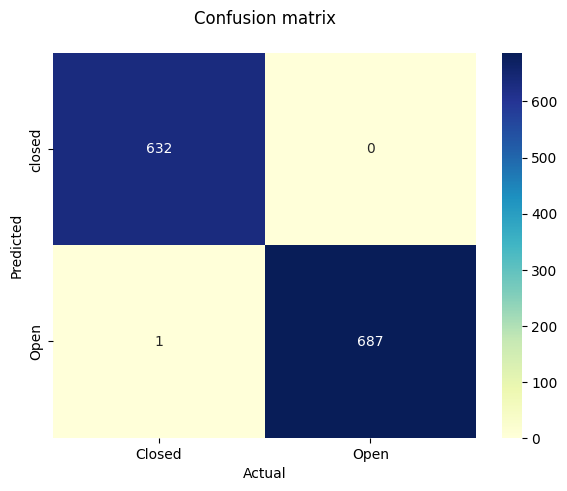

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

In [17]:
# img = best_model.predict('/kaggle/input/testing2/OIP (1).jpg')
# temp = cv2.resize(img,64,64)

In [137]:
X1= []


for i in tqdm(glob('man_face.jpeg')):
    temp = np.array(Image.open(i).resize((64,64)))
    # temp = np.array(Image.open(i))
    X1.append(temp)
    
X3=cv2.imread('eyes_downloaded.jpeg')

100%|██████████| 1/1 [00:00<00:00, 988.76it/s]


In [126]:
X1

[array([[[223, 226, 231],
         [223, 226, 231],
         [223, 226, 231],
         ...,
         [223, 226, 231],
         [223, 226, 231],
         [223, 226, 231]],
 
        [[219, 222, 227],
         [219, 222, 227],
         [219, 222, 227],
         ...,
         [219, 222, 227],
         [219, 222, 227],
         [219, 222, 227]],
 
        [[220, 223, 228],
         [220, 223, 228],
         [220, 223, 228],
         ...,
         [220, 223, 228],
         [220, 223, 228],
         [220, 223, 228]],
 
        ...,
 
        [[220, 223, 228],
         [220, 223, 228],
         [220, 223, 228],
         ...,
         [220, 223, 228],
         [220, 223, 228],
         [220, 223, 228]],
 
        [[220, 223, 228],
         [220, 223, 228],
         [220, 223, 228],
         ...,
         [220, 223, 228],
         [220, 223, 228],
         [220, 223, 228]],
 
        [[224, 227, 232],
         [224, 227, 232],
         [224, 227, 232],
         ...,
         [224, 227, 232],
  

In [138]:
X3=cv2.cvtColor(X3,cv2.COLOR_BGR2RGB)
X3=cv2.resize(X3,(64,64))
X3

array([[[251, 215, 189],
        [251, 215, 189],
        [249, 212, 186],
        ...,
        [231, 186, 155],
        [165, 120,  87],
        [189, 144, 111]],

       [[251, 215, 189],
        [251, 215, 189],
        [249, 212, 186],
        ...,
        [178, 133, 102],
        [236, 191, 158],
        [188, 143, 110]],

       [[248, 212, 187],
        [251, 215, 189],
        [249, 212, 186],
        ...,
        [228, 181, 150],
        [208, 162, 129],
        [209, 164, 130]],

       ...,

       [[252, 232, 213],
        [252, 234, 219],
        [255, 237, 223],
        ...,
        [250, 216, 188],
        [252, 219, 191],
        [250, 220, 193]],

       [[251, 233, 213],
        [254, 235, 220],
        [255, 236, 221],
        ...,
        [250, 216, 188],
        [251, 220, 192],
        [249, 222, 193]],

       [[251, 233, 213],
        [252, 233, 218],
        [253, 234, 220],
        ...,
        [252, 218, 190],
        [253, 222, 194],
        [249, 222, 193]]

In [128]:
X4=cv2.imread('man_face.jpeg')
X4=cv2.cvtColor(X4,cv2.COLOR_BGR2RGB)
X4=cv2.resize(X4,(64,64))
X4

array([[[224, 227, 232],
        [224, 227, 232],
        [224, 227, 232],
        ...,
        [224, 227, 232],
        [224, 227, 232],
        [224, 227, 232]],

       [[220, 223, 228],
        [220, 223, 228],
        [220, 223, 228],
        ...,
        [220, 223, 228],
        [220, 223, 228],
        [220, 223, 228]],

       [[220, 223, 228],
        [220, 223, 228],
        [220, 223, 228],
        ...,
        [220, 223, 228],
        [220, 223, 228],
        [220, 223, 228]],

       ...,

       [[220, 223, 228],
        [220, 223, 228],
        [220, 223, 228],
        ...,
        [220, 223, 228],
        [220, 223, 228],
        [220, 223, 228]],

       [[220, 223, 228],
        [220, 223, 228],
        [220, 223, 228],
        ...,
        [220, 223, 228],
        [220, 223, 228],
        [220, 223, 228]],

       [[225, 228, 233],
        [225, 228, 233],
        [225, 228, 233],
        ...,
        [225, 228, 233],
        [225, 228, 233],
        [225, 228, 233]]

In [103]:
X1[0].shape

(64, 64, 3)

In [81]:
x_test.shape

(1320, 64, 64, 1)

In [139]:
import cv2
import numpy as np

# Assuming X1 is a numpy array and you want to resize the first image in the array

# X2 = X1[0].astype(np.uint8)
X2 = X3.astype(np.uint8)
# Convert to grayscale
X2_gray = cv2.cvtColor(X2, cv2.COLOR_BGR2GRAY)

# Now reshape the resized grayscale image
X1_reshaped = np.reshape(X2_gray, (1,64, 64, 1))

print(X1_reshaped.shape)  # Should print (64, 64, 1)


(1, 64, 64, 1)


In [140]:
X3 = np.array(X3)
X3 = X3/255.0
X3

array([[[0.98431373, 0.84313725, 0.74117647],
        [0.98431373, 0.84313725, 0.74117647],
        [0.97647059, 0.83137255, 0.72941176],
        ...,
        [0.90588235, 0.72941176, 0.60784314],
        [0.64705882, 0.47058824, 0.34117647],
        [0.74117647, 0.56470588, 0.43529412]],

       [[0.98431373, 0.84313725, 0.74117647],
        [0.98431373, 0.84313725, 0.74117647],
        [0.97647059, 0.83137255, 0.72941176],
        ...,
        [0.69803922, 0.52156863, 0.4       ],
        [0.9254902 , 0.74901961, 0.61960784],
        [0.7372549 , 0.56078431, 0.43137255]],

       [[0.97254902, 0.83137255, 0.73333333],
        [0.98431373, 0.84313725, 0.74117647],
        [0.97647059, 0.83137255, 0.72941176],
        ...,
        [0.89411765, 0.70980392, 0.58823529],
        [0.81568627, 0.63529412, 0.50588235],
        [0.81960784, 0.64313725, 0.50980392]],

       ...,

       [[0.98823529, 0.90980392, 0.83529412],
        [0.98823529, 0.91764706, 0.85882353],
        [1.        , 0

In [141]:
import cv2
import numpy as np

# Assuming X1 is a numpy array and you want to resize the first image in the array
#X2 = cv2.resize(X1[0], (64, 64))

# Convert to grayscale
X2_gray = cv2.cvtColor(X2, cv2.COLOR_BGR2GRAY)

# Now reshape the resized grayscale image and add batch dimension
X1_reshaped = np.reshape(X2_gray, (1, 64, 64, 1))

print(X1_reshaped.shape)  # Should print (1, 64, 64, 1)


(1, 64, 64, 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


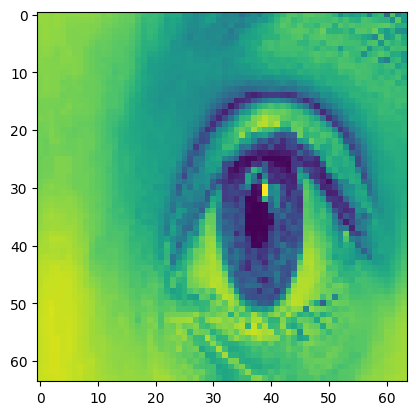

Open


In [142]:
for i in X1_reshaped:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Open')
    else:
        print("Closed")